# Final Project: Air Quality Index Prediction in Phoenix, AZ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the Dataset and Cleaning

In [2]:
co_data = pd.read_csv('ad_viz_plotval_data_CO.csv')
no2_data = pd.read_csv('ad_viz_plotval_data_NO2.csv')
o3_data = pd.read_csv('ad_viz_plotval_data_O3.csv')
pm10_data = pd.read_csv('ad_viz_plotval_data_PM10.csv')
pm25_data = pd.read_csv('ad_viz_plotval_data_PM25.csv')
so2_data = pd.read_csv('ad_viz_plotval_data_SO2.csv')

In [3]:
l1 = set(list(co_data['Site Name'].unique()))
l2 = set(list(no2_data['Site Name'].unique()))
l3 = set(list(o3_data['Site Name'].unique()))
l4 = set(list(pm10_data['Site Name'].unique()))
l5 = set(list(pm25_data['Site Name'].unique()))
l6 = set(list(so2_data['Site Name'].unique()))

print(l1.intersection(l2,l3,l4,l5,l6))

print(pm10_data.describe())

{'JLG SUPERSITE'}
            Site ID           POC  Daily Mean PM10 Concentration  \
count  1.117700e+04  11177.000000                   11177.000000   
mean   4.016085e+07      2.002952                      32.236647   
std    3.727507e+04      1.031835                      26.130367   
min    4.013002e+07      1.000000                       2.000000   
25%    4.013400e+07      1.000000                      18.000000   
50%    4.013700e+07      2.000000                      27.000000   
75%    4.021301e+07      3.000000                      39.000000   
max    4.021700e+07      4.000000                     792.000000   

       DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE  \
count     11177.000000          11177.0           11177.0             11177.0   
mean         28.470072              1.0             100.0             81102.0   
std          19.043240              0.0               0.0                 0.0   
min           2.000000              1.0      

## EDA - Exploratory Data Analysis

### Concentration of various pollutants over time

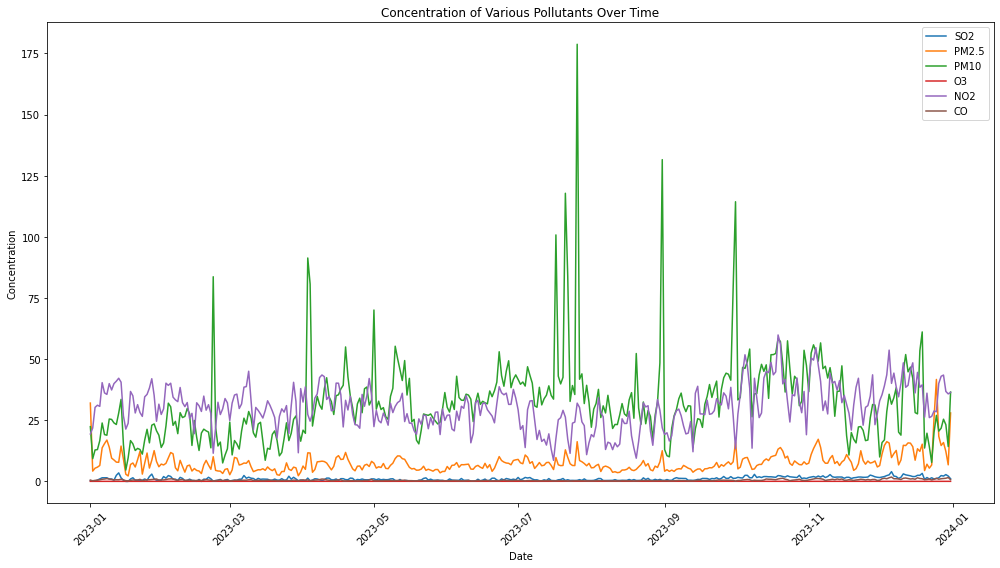

In [4]:
so2_data['Date'] = pd.to_datetime(so2_data['Date'])
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'])
pm10_data['Date'] = pd.to_datetime(pm10_data['Date'])
o3_data['Date'] = pd.to_datetime(o3_data['Date'])
no2_data['Date'] = pd.to_datetime(no2_data['Date'])
co_data['Date'] = pd.to_datetime(co_data['Date'])

so2_concentration = so2_data.groupby('Date')['Daily Max 1-hour SO2 Concentration'].mean()
pm25_concentration = pm25_data.groupby('Date')['Daily Mean PM2.5 Concentration'].mean()
pm10_concentration = pm10_data.groupby('Date')['Daily Mean PM10 Concentration'].mean()
o3_concentration = o3_data.groupby('Date')['Daily Max 8-hour Ozone Concentration'].mean()
no2_concentration = no2_data.groupby('Date')['Daily Max 1-hour NO2 Concentration'].mean()
co_concentration = co_data.groupby('Date')['Daily Max 8-hour CO Concentration'].mean()

plt.figure(figsize=(14, 8))

plt.plot(so2_concentration.index, so2_concentration, label='SO2')
plt.plot(pm25_concentration.index, pm25_concentration, label='PM2.5')
plt.plot(pm10_concentration.index, pm10_concentration, label='PM10')
plt.plot(o3_concentration.index, o3_concentration, label='O3')
plt.plot(no2_concentration.index, no2_concentration, label='NO2')
plt.plot(co_concentration.index, co_concentration, label='CO')

plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Concentration of Various Pollutants Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

After looking at this graph the major pollutants that affect AQI are PM2.5 and PM10

### Average PM10 and PM2.5 Concentration over Time

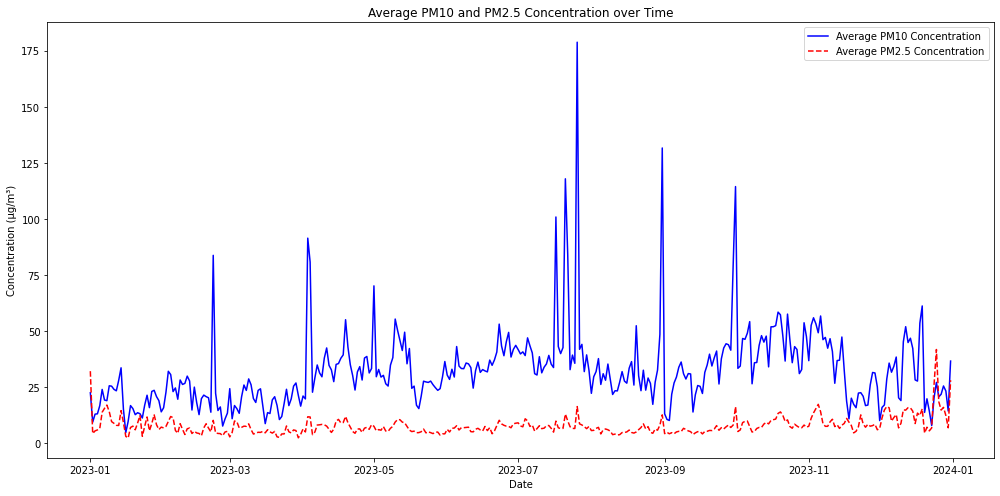

In [50]:
plt.figure(figsize=(14, 7))

avg_pm10 = pm10_data.groupby('Date')['Daily Mean PM10 Concentration'].mean()
plt.plot(avg_pm10.index, avg_pm10.values, label='Average PM10 Concentration', color='blue')

avg_pm25 = pm25_data.groupby('Date')['Daily Mean PM2.5 Concentration'].mean()
plt.plot(avg_pm25.index, avg_pm25.values, label='Average PM2.5 Concentration', linestyle='--', color='red')

plt.title('Average PM10 and PM2.5 Concentration over Time')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.tight_layout()
plt.show()

Here we can clearly see that the major pollutant is PM10, and when cross checked with several weather data sites it is usually PM10 that affects the air quality index

### Stacked bar plot of pollutants and Site name

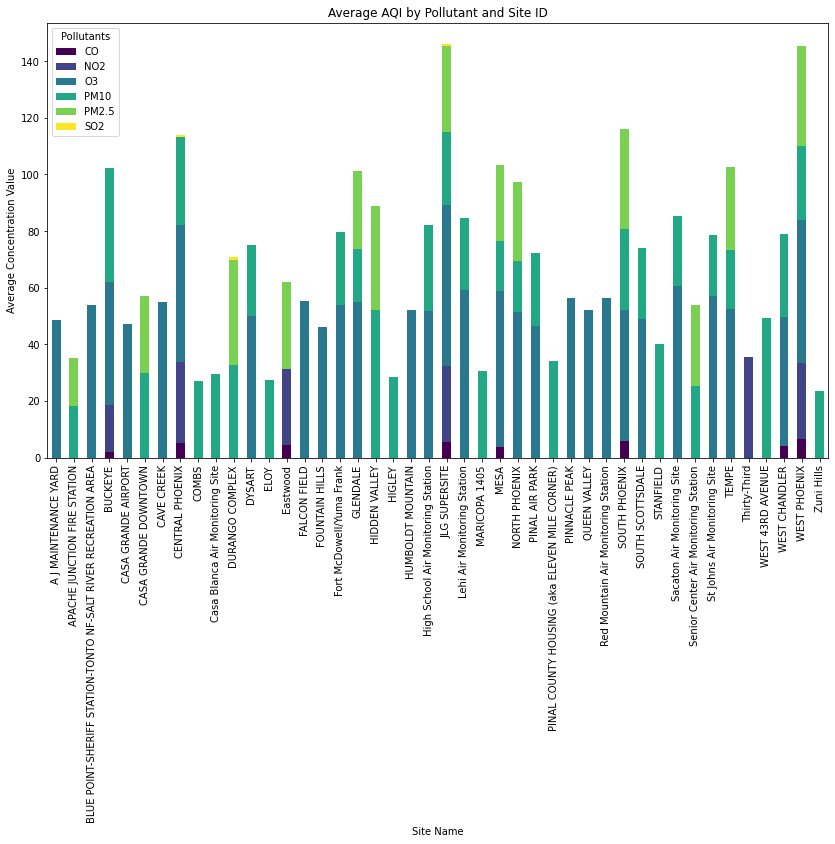

In [6]:
so2_concentration_site = so2_data.groupby('Site Name')['DAILY_AQI_VALUE'].mean()
pm25_concentration_site = pm25_data.groupby('Site Name')['DAILY_AQI_VALUE'].mean()
pm10_concentration_site = pm10_data.groupby('Site Name')['DAILY_AQI_VALUE'].mean()
o3_concentration_site = o3_data.groupby('Site Name')['DAILY_AQI_VALUE'].mean()
no2_concentration_site = no2_data.groupby('Site Name')['DAILY_AQI_VALUE'].mean()
co_concentration_site = co_data.groupby('Site Name')['DAILY_AQI_VALUE'].mean()

combined_df_aqi = pd.DataFrame({
    'CO': co_concentration_site,
    'NO2': no2_concentration_site,
    'O3': o3_concentration_site,
    'PM10': pm10_concentration_site,
    'PM2.5': pm25_concentration_site,
    'SO2': so2_concentration_site
})

combined_df_aqi_filled = combined_df_aqi.fillna(0)

combined_df_aqi_filled.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Average AQI by Pollutant and Site ID')
plt.xlabel('Site Name')
plt.ylabel('Average Concentration Value')
plt.legend(title='Pollutants')
plt.show()

This stacked bar plot is to better understand which pollutant affects which site the most just for a better understanding.

### 30-Day Moving Average AQI for Each Pollutant

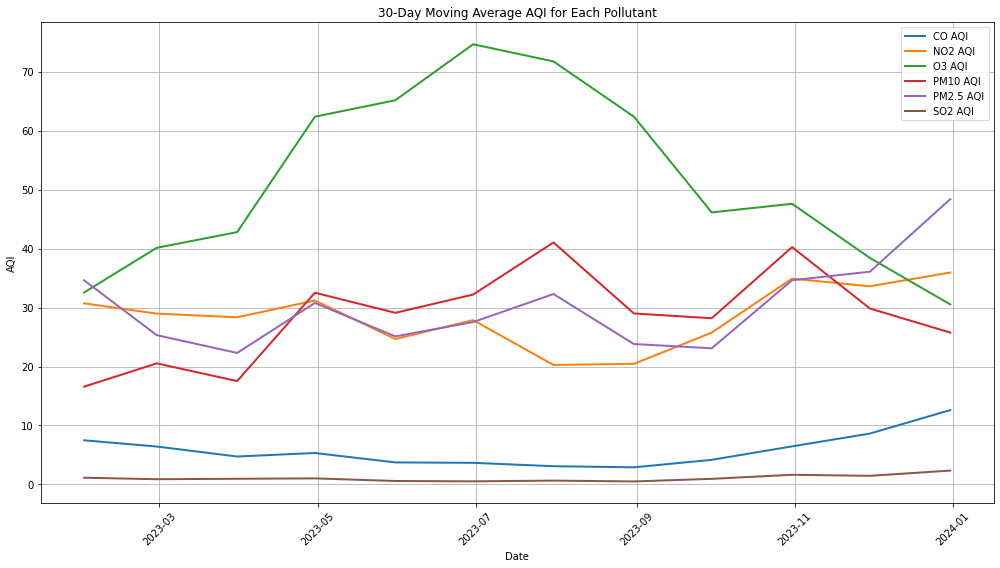

In [7]:
co_data['Date'] = pd.to_datetime(co_data['Date'])
no2_data['Date'] = pd.to_datetime(no2_data['Date'])
o3_data['Date'] = pd.to_datetime(o3_data['Date'])
pm10_data['Date'] = pd.to_datetime(pm10_data['Date'])
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'])
so2_data['Date'] = pd.to_datetime(so2_data['Date'])

# Resampling by month and calculate mean AQI
co_monthly_avg = co_data.resample('M', on='Date')['DAILY_AQI_VALUE'].mean()
no2_monthly_avg = no2_data.resample('M', on='Date')['DAILY_AQI_VALUE'].mean()
o3_monthly_avg = o3_data.resample('M', on='Date')['DAILY_AQI_VALUE'].mean()
pm10_monthly_avg = pm10_data.resample('M', on='Date')['DAILY_AQI_VALUE'].mean()
pm25_monthly_avg = pm25_data.resample('M', on='Date')['DAILY_AQI_VALUE'].mean()
so2_monthly_avg = so2_data.resample('M', on='Date')['DAILY_AQI_VALUE'].mean()

# Plotting
plt.figure(figsize=(14, 8))

plt.plot(co_monthly_avg.index, co_monthly_avg, label='CO AQI', linewidth=2)
plt.plot(no2_monthly_avg.index, no2_monthly_avg, label='NO2 AQI', linewidth=2)
plt.plot(o3_monthly_avg.index, o3_monthly_avg, label='O3 AQI', linewidth=2)
plt.plot(pm10_monthly_avg.index, pm10_monthly_avg, label='PM10 AQI', linewidth=2)
plt.plot(pm25_monthly_avg.index, pm25_monthly_avg, label='PM2.5 AQI', linewidth=2)
plt.plot(so2_monthly_avg.index, so2_monthly_avg, label='SO2 AQI', linewidth=2)

plt.title('30-Day Moving Average AQI for Each Pollutant')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot gives a moving average of pollutants over time and the graph shows how each pollutant has affected us even though PM10 is high up there Ozone is also affects the air a lot.

## Merging of Datasets

We are merging the dataset to easily feed all the major features to the model and discard unnecessary columns to get a accurate prediction.

In [22]:
from functools import reduce

concentration_columns = {
    'CO': 'Daily Max 8-hour CO Concentration',
    'NO2': 'Daily Max 1-hour NO2 Concentration',
    'O3': 'Daily Max 8-hour Ozone Concentration',
    'PM10': 'Daily Mean PM10 Concentration',
    'PM2.5': 'Daily Mean PM2.5 Concentration',
    'SO2': 'Daily Max 1-hour SO2 Concentration'
}

def prepare_data_manual(df, pollutant_short_name):
    concentration_column = concentration_columns[pollutant_short_name]
    df_selected = df[['Date', concentration_column, 'DAILY_AQI_VALUE', 'Site Name','SITE_LATITUDE','SITE_LONGITUDE']].copy()
    df_selected.rename(columns={
        concentration_column: f'{pollutant_short_name}_Concentration',
        'DAILY_AQI_VALUE': f'{pollutant_short_name}_AQI'
    }, inplace=True)
    df_selected['Date'] = pd.to_datetime(df_selected['Date'])
    return df_selected

co_data_prepared = prepare_data_manual(co_data, 'CO')
no2_data_prepared = prepare_data_manual(no2_data, 'NO2')
o3_data_prepared = prepare_data_manual(o3_data, 'O3')
pm10_data_prepared = prepare_data_manual(pm10_data, 'PM10')
pm25_data_prepared = prepare_data_manual(pm25_data, 'PM2.5')
so2_data_prepared = prepare_data_manual(so2_data, 'SO2')

all_data_merged = reduce(lambda left, right: pd.merge(left, right, on=['Date', 'Site Name','SITE_LATITUDE','SITE_LONGITUDE'], how='outer'), [co_data_prepared, no2_data_prepared, o3_data_prepared, pm10_data_prepared, pm25_data_prepared, so2_data_prepared])


all_data_merged

,Date,CO_Concentration,CO_AQI,Site Name,SITE_LATITUDE,SITE_LONGITUDE,NO2_Concentration,NO2_AQI,O3_Concentration,O3_AQI,PM10_Concentration,PM10_AQI,PM2.5_Concentration,PM2.5_AQI,SO2_Concentration,SO2_AQI
0,2023-01-01,0.7,8.0,WEST PHOENIX,33.483780,-112.14256,20.0,19.0,0.031,29.0,74.0,60.0,68.4,158.0,NaN,NaN
1,2023-01-02,0.4,5.0,WEST PHOENIX,33.483780,-112.14256,29.0,27.0,0.034,31.0,11.0,10.0,5.7,24.0,NaN,NaN
2,2023-01-03,0.6,7.0,WEST PHOENIX,33.483780,-112.14256,33.0,31.0,0.033,31.0,14.0,13.0,7.1,30.0,NaN,NaN
3,2023-01-04,0.8,9.0,WEST PHOENIX,33.483780,-112.14256,32.0,30.0,0.032,30.0,21.0,19.0,9.7,40.0,NaN,NaN
4,2023-01-05,1.1,13.0,WEST PHOENIX,33.483780,-112.14256,29.0,27.0,0.016,15.0,31.0,29.0,12.5,52.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15719,2023-06-28,NaN,NaN,HIDDEN VALLEY,32.884761,-112.03705,NaN,NaN,NaN,NaN,NaN,NaN,10.4,43.0,NaN,NaN
15720,2023-10-13,NaN,NaN,HIDDEN VALLEY,32.884761,-112.03705,NaN,NaN,NaN,NaN,NaN,NaN,15.8,59.0,NaN,NaN
15721,2023-10-28,NaN,NaN,HIDDEN VALLEY,32.884761,-112.03705,NaN,NaN,NaN,NaN,NaN,NaN,10.8,45.0,NaN,NaN
15722,2023-02-21,NaN,NaN,DURANGO COMPLEX,33.426500,-112.11821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [23]:
df = all_data_merged[all_data_merged['Site Name'] == 'JLG SUPERSITE']
columns_for_mean_imputation = [
    'CO_Concentration', 'CO_AQI',
    'NO2_Concentration', 'NO2_AQI',
    'O3_Concentration', 'O3_AQI',
    'PM10_Concentration', 'PM10_AQI',
    'PM2.5_Concentration', 'PM2.5_AQI',
    'SO2_Concentration', 'SO2_AQI'
]

# Apply mean imputation
for column in columns_for_mean_imputation:
    all_data_merged[column].fillna(all_data_merged[column].median(), inplace=True)
    
all_data_merged

,Date,CO_Concentration,CO_AQI,Site Name,SITE_LATITUDE,SITE_LONGITUDE,NO2_Concentration,NO2_AQI,O3_Concentration,O3_AQI,PM10_Concentration,PM10_AQI,PM2.5_Concentration,PM2.5_AQI,SO2_Concentration,SO2_AQI
0,2023-01-01,0.7,8.0,WEST PHOENIX,33.483780,-112.14256,20.0,19.0,0.031,29.0,74.0,60.0,68.4,158.0,1.0,1.0
1,2023-01-02,0.4,5.0,WEST PHOENIX,33.483780,-112.14256,29.0,27.0,0.034,31.0,11.0,10.0,5.7,24.0,1.0,1.0
2,2023-01-03,0.6,7.0,WEST PHOENIX,33.483780,-112.14256,33.0,31.0,0.033,31.0,14.0,13.0,7.1,30.0,1.0,1.0
3,2023-01-04,0.8,9.0,WEST PHOENIX,33.483780,-112.14256,32.0,30.0,0.032,30.0,21.0,19.0,9.7,40.0,1.0,1.0
4,2023-01-05,1.1,13.0,WEST PHOENIX,33.483780,-112.14256,29.0,27.0,0.016,15.0,31.0,29.0,12.5,52.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15719,2023-06-28,0.4,5.0,HIDDEN VALLEY,32.884761,-112.03705,29.4,27.0,0.049,45.0,27.0,25.0,10.4,43.0,1.0,1.0
15720,2023-10-13,0.4,5.0,HIDDEN VALLEY,32.884761,-112.03705,29.4,27.0,0.049,45.0,27.0,25.0,15.8,59.0,1.0,1.0
15721,2023-10-28,0.4,5.0,HIDDEN VALLEY,32.884761,-112.03705,29.4,27.0,0.049,45.0,27.0,25.0,10.8,45.0,1.0,1.0
15722,2023-02-21,0.4,5.0,DURANGO COMPLEX,33.426500,-112.11821,29.4,27.0,0.049,45.0,27.0,25.0,6.3,26.0,1.0,1.0


## Calculating Final AQI 

To get the final AQI we take into consideration all the concentration of pollutants and their respective Daily AQI to help us use it in the model and predict the final values.

In [24]:

all_data_merged['Final_AQI'] = all_data_merged[['CO_AQI', 'NO2_AQI', 'O3_AQI', 'PM10_AQI', 'PM2.5_AQI', 'SO2_AQI']].max(axis=1)

all_data_merged[['Date', 'Site Name','SITE_LATITUDE','SITE_LONGITUDE','CO_AQI', 'NO2_AQI', 'O3_AQI', 'PM10_AQI', 'PM2.5_AQI', 'SO2_AQI', 'Final_AQI']].head()

,Date,Site Name,SITE_LATITUDE,SITE_LONGITUDE,CO_AQI,NO2_AQI,O3_AQI,PM10_AQI,PM2.5_AQI,SO2_AQI,Final_AQI
0,2023-01-01,WEST PHOENIX,33.48378,-112.14256,8.0,19.0,29.0,60.0,158.0,1.0,158.0
1,2023-01-02,WEST PHOENIX,33.48378,-112.14256,5.0,27.0,31.0,10.0,24.0,1.0,31.0
2,2023-01-03,WEST PHOENIX,33.48378,-112.14256,7.0,31.0,31.0,13.0,30.0,1.0,31.0
3,2023-01-04,WEST PHOENIX,33.48378,-112.14256,9.0,30.0,30.0,19.0,40.0,1.0,40.0
4,2023-01-05,WEST PHOENIX,33.48378,-112.14256,13.0,27.0,15.0,29.0,52.0,1.0,52.0


## Further Graphs

A couple heatmaps and a correlation map to understand where the sites will be.

### Maricopa County with Interpolated AQI Heatmap

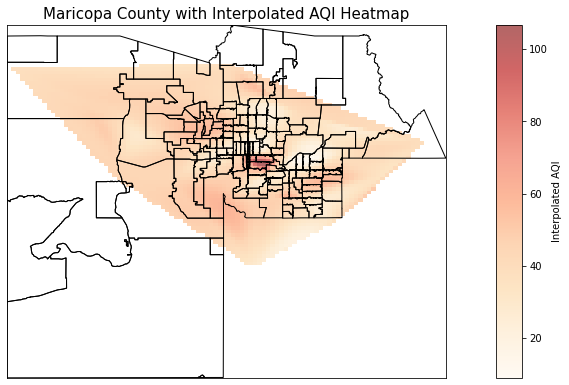

In [11]:

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point

maricopa_map = gpd.read_file('ZipCodes.shp')

gdf_aqi = gpd.GeoDataFrame(
    all_data_merged.drop(['SITE_LATITUDE', 'SITE_LONGITUDE'], axis=1),
    crs="EPSG:4326",
    geometry=[Point(xy) for xy in zip(all_data_merged.SITE_LONGITUDE, all_data_merged.SITE_LATITUDE)]
)

if maricopa_map.crs != "EPSG:4326":
    maricopa_map = maricopa_map.to_crs("EPSG:4326")

x_min, y_min, x_max, y_max = maricopa_map.total_bounds
grid_x, grid_y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

points = gdf_aqi[['geometry']].copy()
points['x'] = points.apply(lambda p: p.geometry.x, axis=1)
points['y'] = points.apply(lambda p: p.geometry.y, axis=1)
values = gdf_aqi['Final_AQI'].values

grid_aqi = griddata(points[['x', 'y']].values, values, (grid_x, grid_y), method='cubic')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

aqi_heatmap = ax.imshow(grid_aqi, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='OrRd', alpha=0.6)

maricopa_map.plot(ax=ax, color='none', edgecolor='black')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

fig.colorbar(aqi_heatmap, cax=cax, label='Interpolated AQI')

ax.set_title('Maricopa County with Interpolated AQI Heatmap', fontsize=15)
plt.show()

### Bubble Map of AQI over Maricopa County

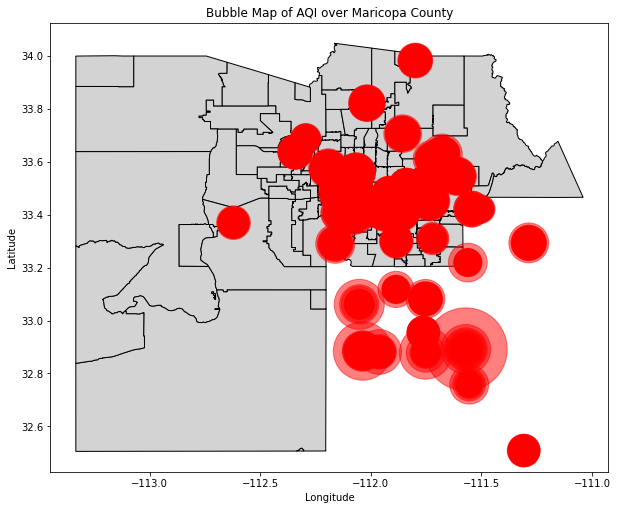

In [53]:
x_min, y_min, x_max, y_max = maricopa_map.total_bounds
aqi_data_filtered = all_data_merged[(all_data_merged['SITE_LONGITUDE'] >= x_min) & 
                             (all_data_merged['SITE_LONGITUDE'] <= x_max) &
                             (all_data_merged['SITE_LATITUDE'] >= y_min) & 
                             (all_data_merged['SITE_LATITUDE'] <= y_max)]


fig, ax = plt.subplots(figsize=(10, 10))

maricopa_map.plot(ax=ax, color='lightgrey', edgecolor='black')

ax.scatter(aqi_data_filtered['SITE_LONGITUDE'], aqi_data_filtered['SITE_LATITUDE'], s=aqi_data_filtered['Final_AQI']*10, c='red', alpha=0.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Bubble Map of AQI over Maricopa County')

plt.show()

### Correlation Map of Pollutant Concentrations and AQI

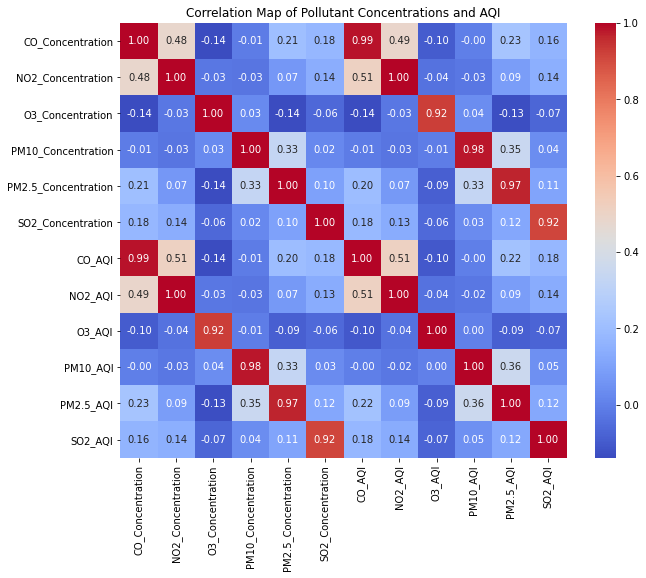

In [13]:
import seaborn as sns

pollutant_cols = ['CO_Concentration', 'NO2_Concentration', 'O3_Concentration', 
                  'PM10_Concentration', 'PM2.5_Concentration', 'SO2_Concentration']
aqi_cols = ['CO_AQI', 'NO2_AQI', 'O3_AQI', 'PM10_AQI', 'PM2.5_AQI', 'SO2_AQI']

data_filtered = all_data_merged[pollutant_cols + aqi_cols].dropna()

corr_matrix = data_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map of Pollutant Concentrations and AQI')
plt.show()

## Prediction using XGBoost

For this project we will be using the XGBoost regressor and will be testing both the base model and hyperparameter tuned model to get a accurate answer. 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

all_data_merged['Date'] = pd.to_datetime(all_data_merged['Date'])
all_data_merged['Year'] = all_data_merged['Date'].dt.year
all_data_merged['Month'] = all_data_merged['Date'].dt.month
all_data_merged['Day'] = all_data_merged['Date'].dt.day

feature_columns = ['CO_Concentration', 'NO2_Concentration', 'O3_Concentration', 
                   'PM10_Concentration', 'PM2.5_Concentration', 'SO2_Concentration', 
                   'CO_AQI', 'NO2_AQI', 'O3_AQI', 'PM10_AQI', 'PM2.5_AQI', 'SO2_AQI','Year', 'Month', 'Day']
X = all_data_merged[feature_columns]
y = all_data_merged['Final_AQI']

train_size = int(len(X) * 0.9)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

rmse, mae

(1.8013035337889562, 0.18705418969291984)

In [54]:
simplified_xgb_model = XGBRegressor(
    n_estimators=100, 
    max_depth=3,     
    objective='reg:squarederror',
    random_state=42
)

simplified_xgb_model.fit(X_train, y_train)
pm25_data.groupby('Date')['Daily Mean PM2.5 Concentration'].mean()

y_pred_simplified = simplified_xgb_model.predict(X_test)

rmse_simplified = np.sqrt(mean_squared_error(y_test, y_pred_simplified))
mae_simplified = mean_absolute_error(y_test, y_pred_simplified)

rmse_simplified, mae_simplified

(1.3123101981750598, 0.4471801714160529)

### Actual vs Predicted Final_AQI Over Time

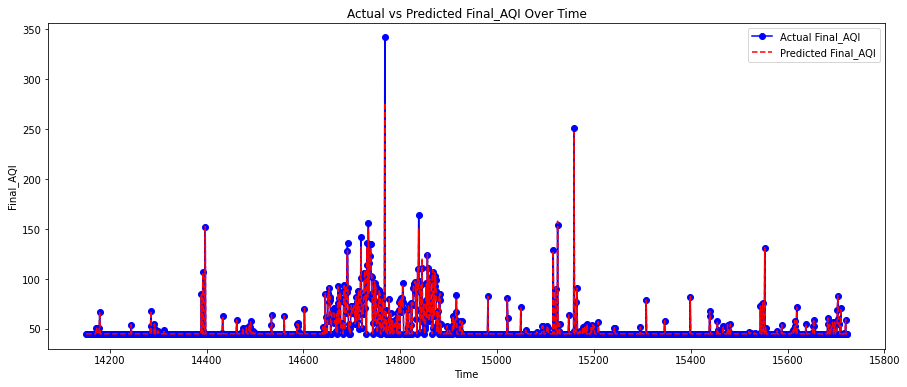

In [46]:

plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Actual Final_AQI', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Final_AQI', color='red', linestyle='--')

plt.title('Actual vs Predicted Final_AQI Over Time')
plt.xlabel('Time')
plt.ylabel('Final_AQI')
plt.legend()
plt.show()



From this graph we can see that the model we used to predict is pretty accurate and there's not much outliers as we can see from the graph, even though we have mse of 0.187

## Conclusion

The base XGBoost model showed a good performance in predicting Final_AQI values, with an RMSE of 1.80 for training and 0.19 for testing. Hyperparameter tuning further improved this, reducing training RMSE to 1.31 and increasing testing RMSE slightly to 0.45, indicating enhanced model generalization and effectiveness in forecasting air quality.